# Decision Tree and Random Forest Tasks

#### The dataset belongs to a financial institution, and our goal is to predict whether a customer will repay the loan if it is granted.

## 1. Data Gathering

1.1 - Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

1.2 - Read the data

* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values `credit_card`, `debt_consolidation`, `educational`, `major_purchase`, `small_business`, and `all_other`).
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
train = ...
validation = ...

In [52]:
train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [53]:
validation.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0.0800,125.35,10.308953,12.20,752,539.958333,70,2.9,0,0,0,0,0,0,0,0,1,0
1,0,0.1450,68.85,11.127263,24.16,662,5370.000000,10498,100.0,1,0,0,1,0,0,0,0,0,0
2,0,0.1134,210.56,10.645425,5.60,682,1199.958333,4713,61.2,6,0,0,1,0,0,0,0,0,0
3,0,0.1513,260.47,10.985361,17.59,647,3480.000000,8135,79.0,3,0,0,1,0,1,0,0,0,0
4,0,0.1482,138.31,10.126471,3.55,642,509.958333,2387,88.4,3,0,0,0,0,0,0,0,0,0


1.3 - Load the dataset and take a quick look at it, displaying general and statistical information as well.

In [ ]:
...

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000
mean,0.894432,0.120469,320.099195,10.925091,12.476188,712.756961,4568.668276,14515.896984,46.334517,1.295012,0.160673,0.060673,0.151508,0.132599,0.419142,0.034455,0.064153,0.045940,0.063921
std,0.307302,0.026059,205.311639,0.606275,6.850396,38.408086,2472.215150,21422.636765,29.094675,1.970745,0.543338,0.260139,0.358564,0.339160,0.493447,0.182405,0.245040,0.209366,0.244627
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100800,164.227500,10.555813,7.120000,682.000000,2849.958333,3182.000000,21.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.121800,273.010000,10.915234,12.530000,707.000000,4139.958333,8489.500000,45.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.137900,435.550000,11.289782,17.800000,742.000000,5729.958333,17582.750000,70.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.212100,918.020000,14.528354,29.960000,827.000000,17639.958330,407794.000000,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
...

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,958.0,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,0.0,0.142179,310.003486,10.995338,13.780825,693.654489,4489.673974,3.849156e+04,50.980731,4.118998,0.191023,0.075157,0.236952,0.124217,0.359081,0.048017,0.079332,0.042797,0.070981
std,0.0,0.025931,222.186740,0.683990,7.075166,28.522528,2709.547253,8.217067e+04,27.951117,2.506509,0.571020,0.279178,0.425435,0.330001,0.479982,0.213913,0.270397,0.202506,0.256928
min,0.0,0.060000,31.200000,8.673000,0.000000,642.000000,390.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.127225,149.072500,10.595859,8.345000,672.000000,2520.000000,3.323750e+03,28.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.141100,246.600000,10.982318,14.090000,692.000000,4079.958333,9.681000e+03,51.200000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.156800,411.440000,11.407565,19.395000,712.000000,5904.750000,3.104500e+04,74.650000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.216400,940.140000,13.304685,29.900000,807.000000,15271.000000,1.207359e+06,106.400000,15.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               8620 non-null   int64  
 1   int.rate                    8620 non-null   float64
 2   installment                 8620 non-null   float64
 3   log.annual.inc              8620 non-null   float64
 4   dti                         8620 non-null   float64
 5   fico                        8620 non-null   int64  
 6   days.with.cr.line           8620 non-null   float64
 7   revol.bal                   8620 non-null   int64  
 8   revol.util                  8620 non-null   float64
 9   inq.last.6mths              8620 non-null   int64  
 10  delinq.2yrs                 8620 non-null   int64  
 11  pub.rec                     8620 non-null   int64  
 12  not.fully.paid              8620 non-null   int64  
 13  purpose_credit_card         8620 

In [ ]:
validation ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               958 non-null    int64  
 1   int.rate                    958 non-null    float64
 2   installment                 958 non-null    float64
 3   log.annual.inc              958 non-null    float64
 4   dti                         958 non-null    float64
 5   fico                        958 non-null    int64  
 6   days.with.cr.line           958 non-null    float64
 7   revol.bal                   958 non-null    int64  
 8   revol.util                  958 non-null    float64
 9   inq.last.6mths              958 non-null    int64  
 10  delinq.2yrs                 958 non-null    int64  
 11  pub.rec                     958 non-null    int64  
 12  not.fully.paid              958 non-null    int64  
 13  purpose_credit_card         958 non

## 2. Exploratory Data Analysis(EDA)

2.1 - Plot a histogram of the `fico` feature, separated by `credit.policy`, with the two distributions overlaid on the same chart.

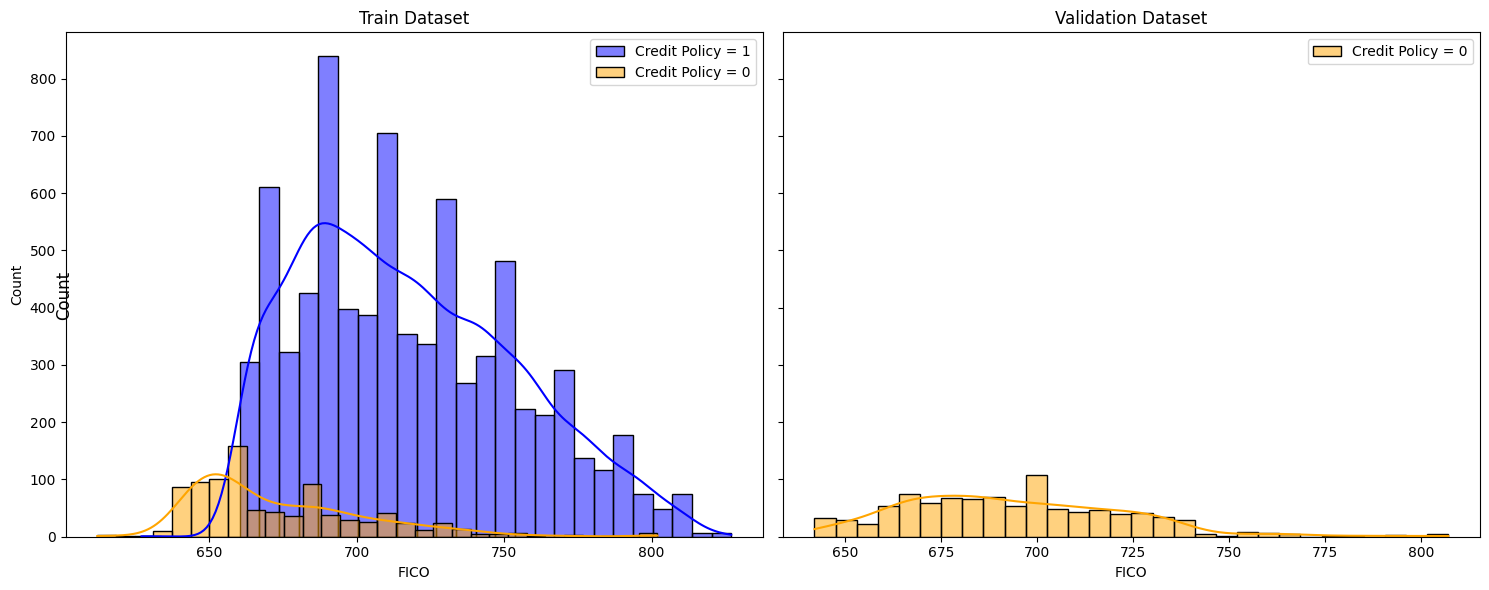

2.2 - Plot the same histogram as above, but this time separated by the label `not.fully.paid`.

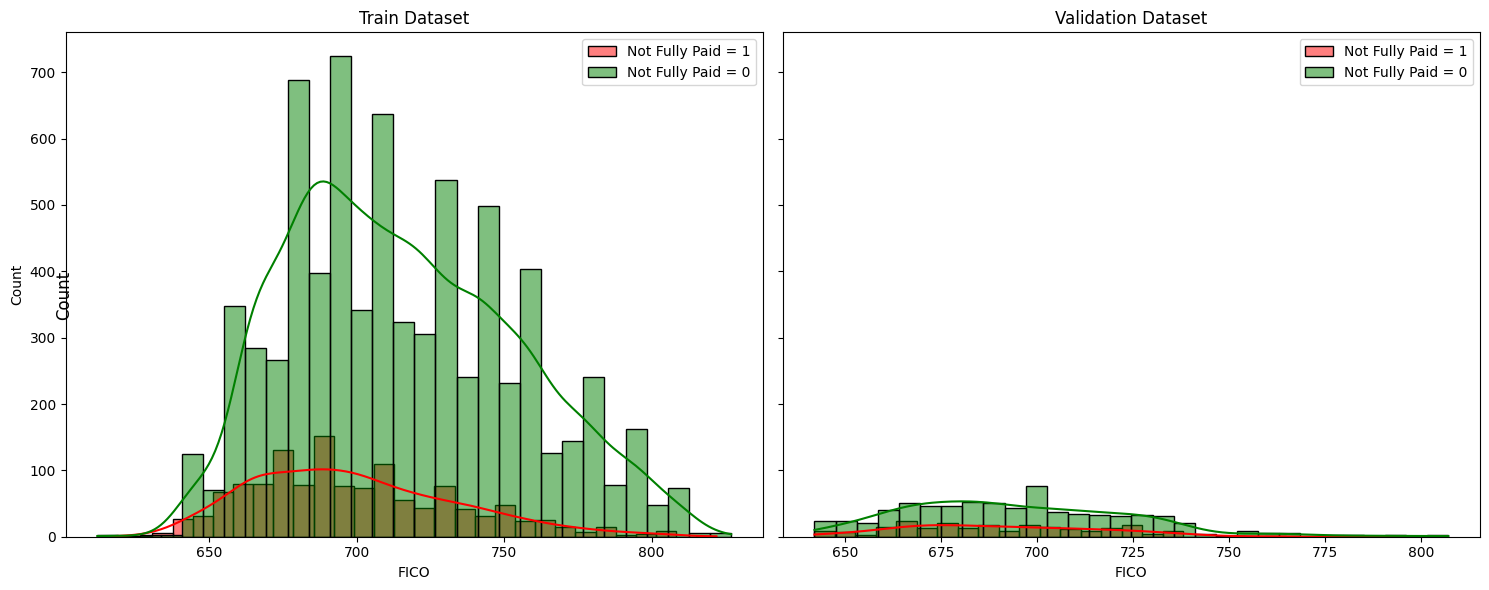

2.3 - Plot a jointplot for the features `fico` and `int.rate`.

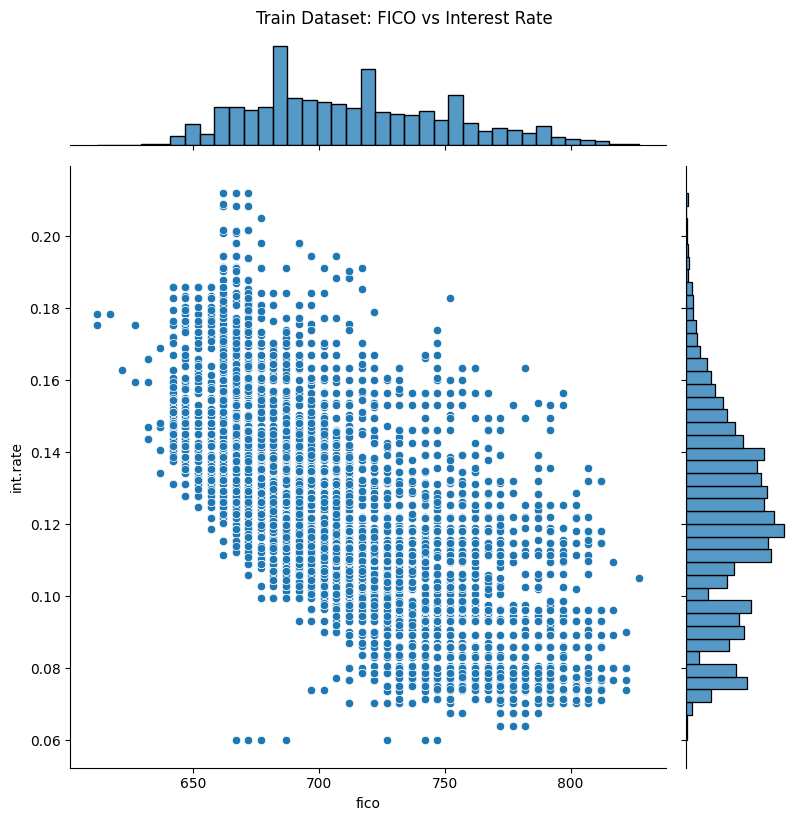

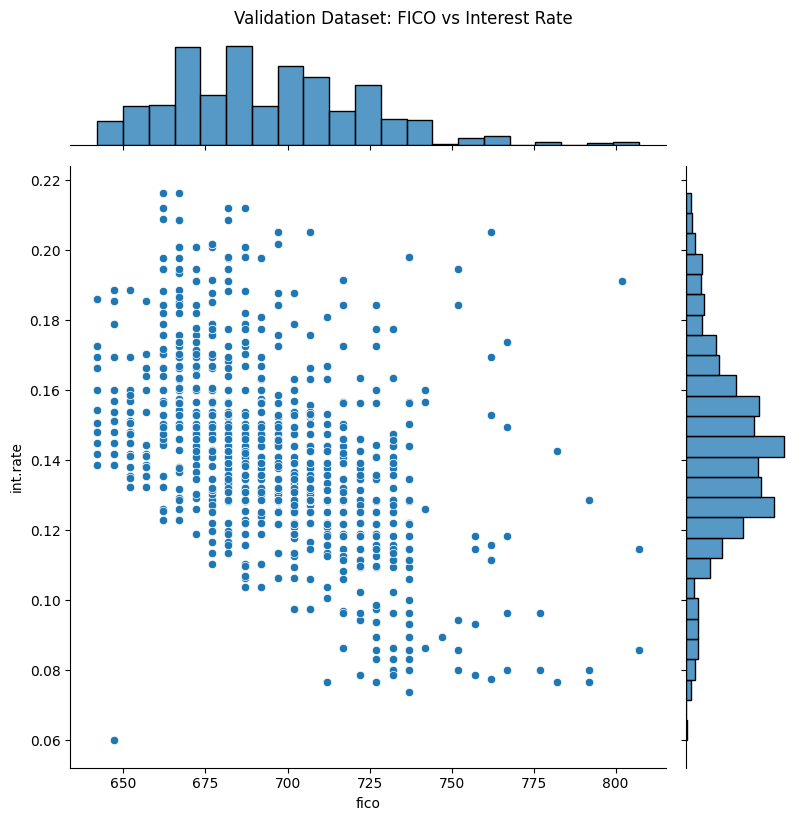

2.5 It seems that we have discovered a correlation. To examine these correlations more precisely, plot an `lmplot` based on `fico`, with two separate columns indicating whether the loan was repaid or not, and distinguish by `credit.policy`.

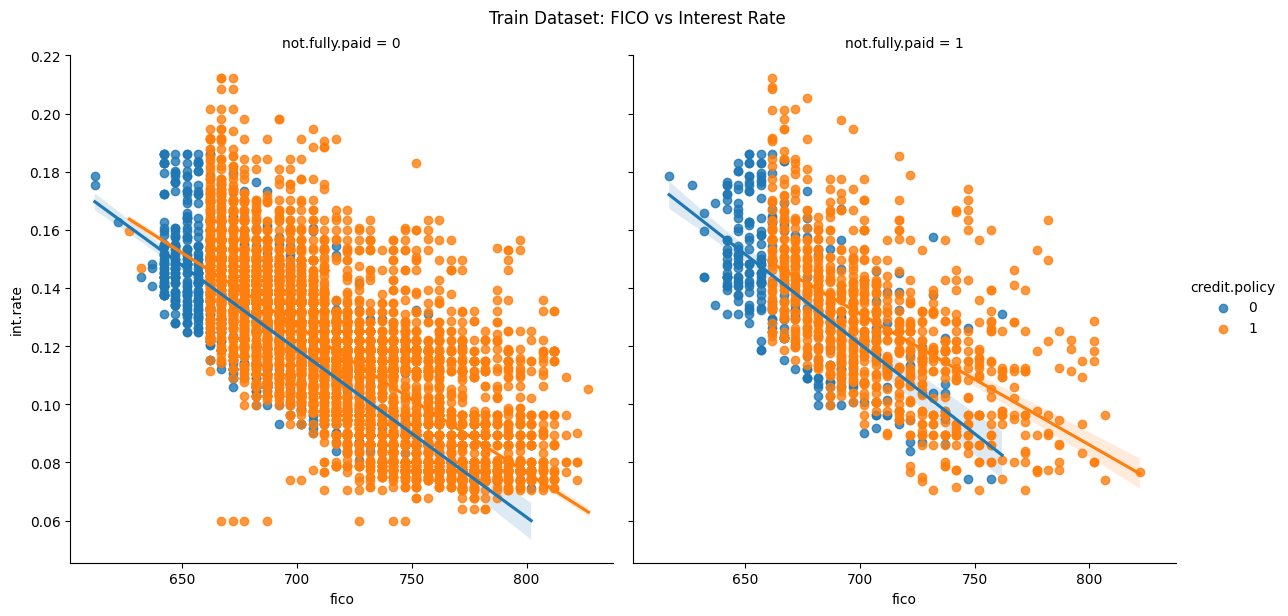

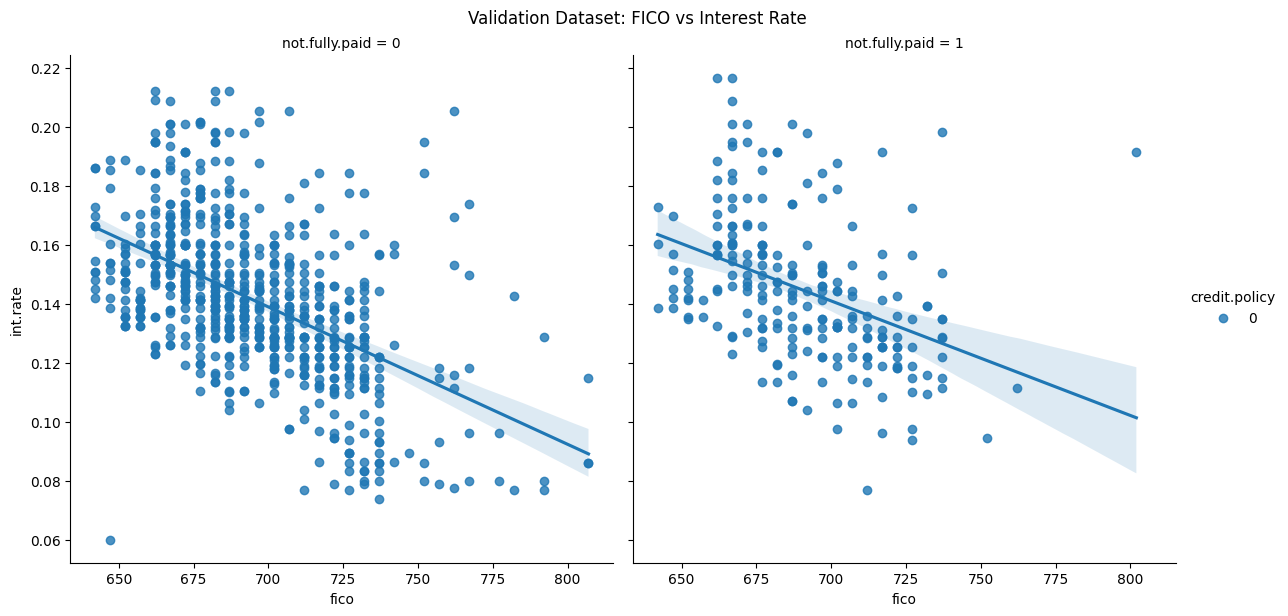

2.6 - Please write a paragraph explaining the information and insights obtained from the charts you plotted.

# 3 Data Setup

3.1 - Why is it necessary to convert categorical data into numeric data for machine learning models? How does this process affect the model's performance? Should all categorical data be converted to numeric data, and does this conversion always have a positive impact on the model's performance?

# 4. Implementing model (Decision Tree & Random Forest)

4.1 - Train a Decision Tree model on the training dataset

In [ ]:
train_x = train.drop(...)
train_y = train[...]

validation_x = validation.drop(...)
validation_y = validation[...]

In [ ]:
# Decision Tree
decision_tree = ...
decision_tree.fit(...)

DecisionTreeClassifier()

In [ ]:
# Random Forest
random_forest = ...
random_forest.fit(...)

RandomForestClassifier()

# 5. Prediction & Evaluation

5.1 - Please make a prediction for the test dataset

In [ ]:
# Decision Tree
decision_tree_preds = ...

In [ ]:
# Random Forest
random_forest_preds = ...

5.2 - For the evaluation of classification models, the following metrics are commonly used: **Precision**, **Recall**, **F1-Score (Macro)**, **F1-Score (Micro)**, and **ROC-AUC**.  

- **a)** Define each metric and explain how it is calculated.  
- **b)** Discuss what each metric represents in terms of model performance and in which scenarios it is most useful.  
- **c)** Compare **F1-Score (Macro)** and **F1-Score (Micro)**, highlighting the differences in their calculations and applications.  
- **d)** Explain how the **ROC-AUC** metric helps in evaluating model performance across different classification thresholds.  

Make sure to provide examples or scenarios where each metric would be particularly valuable.

5.3 - Please compare your predicctions of your models and test labels and evaluate your models. You can see the evaluation metrics below:


- Classification Report
- Confusion Matrix
- F1-Score (macro)
- F1-Score (micro)
- ROC-AUC

In [61]:
def display_metrics(model_name, y_true, y_pred, y_prob=None):
    print(f"\n\n===== Metrics for {model_name} =====")
    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=["True Negative", "True Positive"], 
                                  columns=["Predicted Negative", "Predicted Positive"])
    print(conf_matrix_df)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    print(f"F1-Score (Macro): {f1_macro:.4f}")
    print(f"F1-Score (Micro): {f1_micro:.4f}")
    if y_prob is not None:
        roc_auc = roc_auc_score(y_true, y_prob)
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC: Not applicable (no probability predictions available)")

display_metrics("Random Forest", validation_y, random_forest_preds, 
                random_forest.predict_proba(validation_x)[:, 1])

display_metrics("Decision Tree", validation_y, decision_tree_preds, 
                decision_tree.predict_proba(validation_x)[:, 1])



===== Metrics for Random Forest =====

Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                 636                  95
True Positive                 183                  44

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       731
           1       0.32      0.19      0.24       227

    accuracy                           0.71       958
   macro avg       0.55      0.53      0.53       958
weighted avg       0.67      0.71      0.68       958

F1-Score (Macro): 0.5305
F1-Score (Micro): 0.7098
ROC-AUC: 0.5585


===== Metrics for Decision Tree =====

Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                 442                 289
True Positive                 133                  94

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       731
        